In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Flatten,Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Input
warnings.filterwarnings("ignore")

from tensorflow.keras.preprocessing import image_dataset_from_directory

2024-10-22 20:31:41.581125: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-22 20:31:41.606809: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-22 20:31:41.635222: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-22 20:31:41.641376: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-22 20:31:41.659473: I tensorflow/core/platform/cpu_feature_guar

In [3]:
train_data=image_dataset_from_directory("EuroSAT_RGB",batch_size=32,image_size=(32, 32),validation_split=0.25,subset="training",seed=42)
val_data=image_dataset_from_directory("EuroSAT_RGB",batch_size=32,image_size=(32, 32),validation_split=0.25,subset="validation",seed=42)

Found 27000 files belonging to 10 classes.
Using 20250 files for training.
Found 27000 files belonging to 10 classes.
Using 6750 files for validation.


# Resnet50 (Baseline model)

In [4]:
from tensorflow.keras.applications import ResNet50

In [6]:
res = ResNet50(input_shape=[32,32,3], weights='imagenet', include_top=False)

In [7]:
for layer in res.layers:
    layer.trainable = False

x = Flatten()(res.output)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=res.input, outputs=x)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history=model.fit(train_data,epochs=10,validation_data=val_data,batch_size=16)

Epoch 1/10


I0000 00:00:1729609392.970791   79826 service.cc:146] XLA service 0x7aa91404a980 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729609392.970853   79826 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2024-10-22 20:33:13.337560: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-22 20:33:14.679836: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-22 20:33:16.055286: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5592', 196 bytes spill stores, 196 bytes spill loads



  8/633 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.1384 - loss: 3.5168 

I0000 00:00:1729609399.088817   79826 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


629/633 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7173 - loss: 0.9651

2024-10-22 20:33:32.156748: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5592', 208 bytes spill stores, 208 bytes spill loads



633/633 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7178 - loss: 0.9633

2024-10-22 20:33:43.795223: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1682', 208 bytes spill stores, 208 bytes spill loads



633/633 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.7179 - loss: 0.9629 - val_accuracy: 0.8327 - val_loss: 0.5232
Epoch 2/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8610 - loss: 0.4273 - val_accuracy: 0.8483 - val_loss: 0.4828
Epoch 3/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8850 - loss: 0.3409 - val_accuracy: 0.8456 - val_loss: 0.5203
Epoch 4/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.8961 - loss: 0.3000 - val_accuracy: 0.8510 - val_loss: 0.5057
Epoch 5/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9041 - loss: 0.2676 - val_accuracy: 0.8535 - val_loss: 0.5053
Epoch 6/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9153 - loss: 0.2432 - val_accuracy: 0.8505 - val_loss: 0.5410
Epoch 7/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9213 - loss: 0.2213 - val_accuracy: 0.8513 - val_loss: 0.5414
Epoch 8/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9299 - loss: 0.1980 - val_accurac

In [9]:
model.save("resnet_classification.keras")

In [10]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

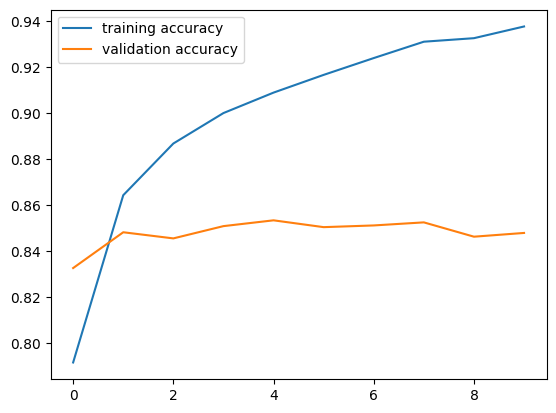

In [11]:
plt.plot(history.history["accuracy"],label="training accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show()

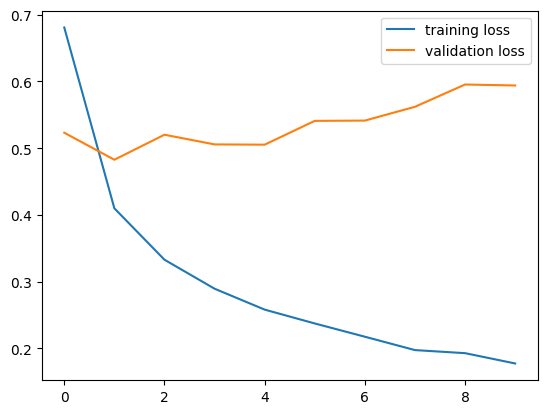

In [12]:
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.legend()
plt.show()